#### Equipo: 14
#### Grupo: 002  (Miércoles 19:00 hrs. - 22:00 hrs.)
#### Alumno: Tadeo Alejandro Suárez Martínez
#### Matricula: 1806069

*Prediccion de cancer de cuello uterino

### 2. Descripcion de los datos:
El conjunto de datos se recopiló en el "Hospital Universitario de Caracas"  en Caracas, Venezuela. Comprende información demográfica, hábitos e historiales médicos de 858 pacientes. Estos datos se centran en el diagnóstico de cáncer de cuello uterino.

Esta base de datos tiene 36 columnas con datos enteros y flotantes, tiene datos categoricos y numericos, su tamaño es de 858

### 3. Justificacion del uso de datos

Me decidí a trabajar con esta base de datos porque me quería centrar en alguna enfermedad mortal, para ayudar con el diagnostico de esta, ya que se pueden emplear muchas técnicas, busqué en varias bases de datos y esta fue la que vi que tenía información más útil y concreta. Cuenta con información sólida y los datos están muy completos, confió plenamente en que puedo hacer un buen trabajo de predicción con estos, ya que tiene toda la información necesaria acerca del tumor de cada paciente. 

### 4. Objetivos

El objetivo final es predecir si la biopsia tendra un resultado positivo onegativo en bases a otras puebas y caracteristicas como la edad, enfermedades de transmicion sexual, embarazos, numero de parejas sexuales, pruebas etc.
Objetivos secundario:
* Ver el promedio de edad de las personas positivas con la enfermedad de cuello uterino
* Promedio de parejas sexuales de las personas con la enfermedad de cuello uterino

Importacion de librerias

In [1]:
import pandas as pd
import numpy as np

Leyendo el archivo

In [2]:
df=pd.read_csv("E:/7mo Semestre/Tadeo/Mineria de datos/PIA/Cancer.csv")

### Mostrando los datos sin manipulacion

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


Declarando los valores nulos de la base de datos

In [4]:
df=pd.read_csv("E:/7mo Semestre/Tadeo/Mineria de datos/PIA/Cancer.csv",na_values="?")

Tenemos las 858 filas y 36 columnas mencionadas anteriormente

In [5]:
df.shape

(858, 36)

Lo que significa que tenemos 857 personas en la base de datos

#### Columnas de mi base de datos

In [6]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Cambiando nombre a las columnas
* Debido a que las pondremos en español y las nombraremos sin espacios para poder usarlas en los comandos unique

In [7]:
df.rename(columns={"Number of sexual partners":"Numero_de_parejas_sexuales","First sexual intercourse":"Edad_Primer_relacion_Sexual",'Num of pregnancies':"Numero_de_embarazos","Smokes":"Fuma","Smokes (years)":"Años_fumando","Smokes (packs/year)":"Paquetes_de_cigarrillo_por_año","Hormonal Contraceptives":"Anticonceptivos_hormonales","Hormonal Contraceptives (years)":"Años de uso del anticonceptivo",'IUD':"DIU","STDs:AIDS":"STDsSIDA"},inplace=True )

Tipo de datos de las columnas

In [8]:
df.dtypes

Age                                     int64
Numero_de_parejas_sexuales            float64
Edad_Primer_relacion_Sexual           float64
Numero_de_embarazos                   float64
Fuma                                  float64
Años_fumando                          float64
Paquetes_de_cigarrillo_por_año        float64
Anticonceptivos_hormonales            float64
Años de uso del anticonceptivo        float64
DIU                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDsSIDA                          

Valores unicos de algunas columnas

In [9]:
df.Numero_de_parejas_sexuales.unique()

array([ 4.,  1.,  5.,  3.,  2.,  6., nan,  7., 15.,  8., 10., 28.,  9.])

In [10]:
df.STDsSIDA.unique()

array([ 0., nan])

In [11]:
df.sum()

Age                                   23012.000000
Numero_de_parejas_sexuales             2103.000000
Edad_Primer_relacion_Sexual           14463.000000
Numero_de_embarazos                    1825.000000
Fuma                                    123.000000
Años_fumando                           1030.664594
Paquetes_de_cigarrillo_por_año          382.906638
Anticonceptivos_hormonales              481.000000
Años de uso del anticonceptivo         1692.314401
DIU                                      83.000000
IUD (years)                             381.470000
STDs                                     79.000000
STDs (number)                           133.000000
STDs:condylomatosis                      44.000000
STDs:cervical condylomatosis              0.000000
STDs:vaginal condylomatosis               4.000000
STDs:vulvo-perineal condylomatosis       43.000000
STDs:syphilis                            18.000000
STDs:pelvic inflammatory disease          1.000000
STDs:genital herpes            

## Eliminando columnas no deseadas
Nos damos cuenta que algunas columnas no aportan informacion asi que las eliminaremos

In [12]:
df=df.drop(['STDsSIDA',"STDs:cervical condylomatosis"],axis=1)

## Datos nulos

In [13]:
df.isnull()

,Age,Numero_de_parejas_sexuales,Edad_Primer_relacion_Sexual,Numero_de_embarazos,Fuma,Años_fumando,Paquetes_de_cigarrillo_por_año,Anticonceptivos_hormonales,Años de uso del anticonceptivo,DIU,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
854,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


Comprobando que columnas tienen datos nulos

In [14]:
df.isnull().any()

Age                                   False
Numero_de_parejas_sexuales             True
Edad_Primer_relacion_Sexual            True
Numero_de_embarazos                    True
Fuma                                   True
Años_fumando                           True
Paquetes_de_cigarrillo_por_año         True
Anticonceptivos_hormonales             True
Años de uso del anticonceptivo         True
DIU                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:HIV                               True
STDs:Hepatitis B                       True
STDs:HPV                        

Como vemos la mayoria de las columnas tienen datos nulos

In [15]:
df.isnull().sum()

Age                                     0
Numero_de_parejas_sexuales             26
Edad_Primer_relacion_Sexual             7
Numero_de_embarazos                    56
Fuma                                   13
Años_fumando                           13
Paquetes_de_cigarrillo_por_año         13
Anticonceptivos_hormonales            108
Años de uso del anticonceptivo        108
DIU                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis         

Las columnas STDs: Time since first diagnosis y STDs: Time since last diagnosis tienen mas del 80% de datos nulos asi que las eliminaremos

In [16]:
df=df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

Decidi que rellenare los datos nulos con la mediana para trabajar con la base

In [17]:
df['Numero_de_parejas_sexuales'] = df['Numero_de_parejas_sexuales'].fillna(df['Numero_de_parejas_sexuales'].median())
df['Edad_Primer_relacion_Sexual'] = df['Edad_Primer_relacion_Sexual'].fillna(df['Edad_Primer_relacion_Sexual'].median())
df["Numero_de_embarazos"] = df["Numero_de_embarazos"].fillna(df["Numero_de_embarazos"].median())
df['Fuma'] = df['Fuma'].fillna(1)
df['Años_fumando'] = df['Años_fumando'].fillna(df['Años_fumando'].median())
df['Paquetes_de_cigarrillo_por_año'] = df['Paquetes_de_cigarrillo_por_año'].fillna(df['Paquetes_de_cigarrillo_por_año'].median())
df['Anticonceptivos_hormonales'] = df['Anticonceptivos_hormonales'].fillna(1)
df['Años de uso del anticonceptivo'] = df['Años de uso del anticonceptivo'].fillna(df['Años de uso del anticonceptivo'].median())
df['DIU'] = df['DIU'].fillna(0) 
df['IUD (years)'] = df['IUD (years)'].fillna(0) 
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())

Ahora hare una base de datos con solo los resultados de la biopsia positivos

In [18]:
positivos = df[df['Biopsy']==1]

positivos.to_csv('Solo_positivos.csv', index=False)

Ahora separare las variables categoricas y numericas de la base de datos

In [19]:
variables=list(df.columns)

In [20]:
variables_categoricas=['Fuma','Anticonceptivos_hormonales','DIU','STDs','STDs:condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx',"Hinselmann","Schiller","Citology","Biopsy"]
variables_categoricas

['Fuma',
 'Anticonceptivos_hormonales',
 'DIU',
 'STDs',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

In [21]:
variables_numericas=[i for i in variables if i not in variables_categoricas]
variables_numericas

['Age',
 'Numero_de_parejas_sexuales',
 'Edad_Primer_relacion_Sexual',
 'Numero_de_embarazos',
 'Años_fumando',
 'Paquetes_de_cigarrillo_por_año',
 'Años de uso del anticonceptivo',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis']

In [22]:
df_numeric=df.drop(variables_categoricas,axis=1)
df_categorica=df.drop(variables_numericas,axis=1)

## Creando un nuevo archivo con la base de datos editada

In [23]:
df.to_csv('df_Clean.csv')

In [24]:
df=pd.read_csv("df_Clean.csv")

-----------------

# Estadistica basica de los datos
Veremos de manera resumida la iformacion estadistica de mis variables

In [25]:
df[df_numeric.columns].describe()

,Age,Numero_de_parejas_sexuales,Edad_Primer_relacion_Sexual,Numero_de_embarazos,Años_fumando,Paquetes_de_cigarrillo_por_año,Años de uso del anticonceptivo,IUD (years),STDs (number),STDs: Number of diagnosis
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.087413
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.302545
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000


Ahora veremos la covarianza para ver que tipo de realcion tienen las variables

In [26]:
df.cov()

,Unnamed: 0,Age,Numero_de_parejas_sexuales,Edad_Primer_relacion_Sexual,Numero_de_embarazos,Fuma,Años_fumando,Paquetes_de_cigarrillo_por_año,Anticonceptivos_hormonales,Años de uso del anticonceptivo,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Unnamed: 0,61418.500000,-340.791132,-8.386814,-92.980163,-56.029755,2.287048,-28.626075,-37.607515,-7.542007,-96.544617,...,0.949825,-1.460327,1.758460,0.885064,0.836639,3.175029,-2.956243,-0.838973,1.646441,-0.279463
Age,-340.791132,72.215121,1.201628,8.758789,6.260988,0.140502,7.531516,2.476803,0.115190,8.950297,...,0.016755,-0.004129,0.134458,0.053227,0.123957,0.129881,-0.006672,0.246537,-0.031625,0.116537
Numero_de_parejas_sexuales,-8.386814,1.201628,2.705232,-0.669724,0.178441,0.146342,1.173652,0.636094,0.003075,0.124310,...,0.001140,0.026401,0.005590,0.002795,0.006756,0.006675,-0.012728,-0.003340,0.008736,-0.000165
Edad_Primer_relacion_Sexual,-92.980163,8.758789,-0.669724,7.794611,-0.220501,-0.121781,-0.659883,-0.347011,-0.011965,0.249675,...,0.004678,-0.011261,0.026936,-0.009286,0.017601,0.016467,-0.009144,0.002736,-0.006762,0.004967
Numero_de_embarazos,-56.029755,6.260988,0.178441,-0.220501,1.962749,0.034970,1.000284,0.300300,0.077349,1.093447,...,-0.001768,0.014798,0.007425,-0.000371,0.009759,0.003288,0.010484,0.033768,-0.008557,0.013808
Fuma,2.287048,0.140502,0.146342,-0.121781,0.034970,0.133539,1.012014,0.375978,-0.000422,0.037383,...,0.000797,0.012966,0.000171,-0.001665,0.001338,-0.003272,0.002861,0.006150,0.000030,0.002663
Años_fumando,-28.626075,7.531516,1.173652,-0.659883,1.000284,1.012014,16.488655,6.501066,-0.026178,0.753270,...,0.010032,0.096197,0.030779,-0.012615,0.032257,-0.033640,0.056542,0.106622,-0.006520,0.060909
Paquetes_de_cigarrillo_por_año,-37.607515,2.476803,0.636094,-0.347011,0.300300,0.375978,6.501066,4.885653,0.001757,0.341097,...,-0.000855,0.020003,0.033987,-0.004687,0.034586,-0.012498,0.011412,0.010679,0.002073,0.013265
Anticonceptivos_hormonales,-7.542007,0.115190,0.003075,-0.011965,0.077349,-0.000422,-0.026178,0.001757,0.215476,0.638861,...,0.000732,-0.008735,0.000751,-0.000208,0.001918,-0.000555,0.001136,-0.004434,-0.002573,-0.002049
Años de uso del anticonceptivo,-96.544617,8.950297,0.124310,0.249675,1.093447,0.037383,0.753270,0.341097,0.638861,12.723776,...,0.009252,-0.030525,0.032210,0.001379,0.033575,-0.005377,0.036072,0.096891,0.064977,0.082318


Miraremos la correlacion de las variables para saber si algunas variables tienen demasiada relacion y descartarla de la base de datos

In [27]:
df.corr()

,Unnamed: 0,Age,Numero_de_parejas_sexuales,Edad_Primer_relacion_Sexual,Numero_de_embarazos,Fuma,Años_fumando,Paquetes_de_cigarrillo_por_año,Anticonceptivos_hormonales,Años de uso del anticonceptivo,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Unnamed: 0,1.000000,-0.161817,-0.020575,-0.134383,-0.161375,0.025254,-0.028446,-0.068654,-0.065560,-0.109212,...,0.079428,-0.019476,0.049481,0.035034,0.023542,0.077650,-0.060269,-0.012052,0.030102,-0.004601
Age,-0.161817,1.000000,0.085971,0.369175,0.525892,0.045244,0.218261,0.131861,0.029201,0.295267,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Numero_de_parejas_sexuales,-0.020575,0.085971,1.000000,-0.145847,0.077439,0.243479,0.175729,0.174968,0.004027,0.021188,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
Edad_Primer_relacion_Sexual,-0.134383,0.369175,-0.145847,1.000000,-0.056374,-0.119365,-0.058207,-0.056232,-0.009232,0.025071,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Numero_de_embarazos,-0.161375,0.525892,0.077439,-0.056374,1.000000,0.068307,0.175832,0.096976,0.118938,0.218805,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Fuma,0.025254,0.045244,0.243479,-0.119365,0.068307,1.000000,0.682009,0.465475,-0.002485,0.028679,...,0.045197,0.117277,0.003270,-0.044686,0.025538,-0.054271,0.039562,0.059913,0.000371,0.029733
Años_fumando,-0.028446,0.218261,0.175729,-0.058207,0.175832,0.682009,1.000000,0.724320,-0.013888,0.052006,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Paquetes_de_cigarrillo_por_año,-0.068654,0.131861,0.174968,-0.056232,0.096976,0.465475,0.724320,1.000000,0.001713,0.043262,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Anticonceptivos_hormonales,-0.065560,0.029201,0.004027,-0.009232,0.118938,-0.002485,-0.013888,0.001713,1.000000,0.385833,...,0.032666,-0.062199,0.011278,-0.004397,0.028808,-0.007245,0.012360,-0.034002,-0.025116,-0.018015
Años de uso del anticonceptivo,-0.109212,0.295267,0.021188,0.025071,0.218805,0.028679,0.052006,0.043262,0.385833,1.000000,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164


Uno de mis objetivos secundarios era saber el promedio de la edad de los pacientes con biopsia positiva

In [28]:
positivos["Age"].mean()

28.636363636363637

In [29]:
positivos["Age"].mode()

0    21
1    28
dtype: int64

Otro de mis objetivos secundarios era saber el promedio del numero de parejas sexuales con biopsia positiva

In [30]:
positivos["Numero_de_parejas_sexuales"].mean()

2.5090909090909093

In [31]:
positivos["Numero_de_parejas_sexuales"].mode()

0    2.0
dtype: float64

* Notamos que la media de la edad de las personas que tienen la enfermedad de cuello uterino es de 28 años, y la mayoria de las personas quie tienen esta enfermedad tienen 21 y 28 años
* Notamos que la media de las parejas sexuales que han tenido de las personas que tienen la enfermedad de cuello uterino es de 2 parejas, lo cual indica que no es necesario haber tenido muchas parejas para tener esta enfermedad

# Graficas

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

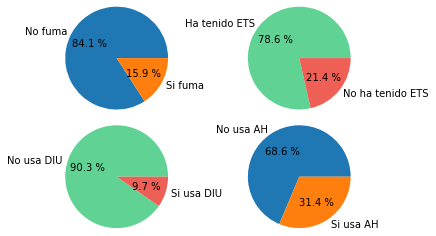

In [33]:
fig, axs = plt.subplots(2,2)

axs[0,0].pie(df["Fuma"].value_counts(), labels=["No fuma","Si fuma"], autopct="%.1f %%",radius=1.3)

axs[0,1].pie(df["STDs"].value_counts(),labels=["Ha tenido ETS","No ha tenido ETS"],autopct='%.1f %%',colors=["#60D394","#EE6055"],radius=1.3)

axs[1,1].pie(df["Anticonceptivos_hormonales"].value_counts(), labels=["No usa AH","Si usa AH"], autopct="%.1f %%",radius=1.3)

axs[1,0].pie(df["DIU"].value_counts(),labels=["No usa DIU","Si usa DIU"],autopct='%.1f %%',colors=["#60D394","#EE6055"],radius=1.3)

plt.show()

* El 15.9 % de personas de la muestra fuman.
* El 21% de las personas de la muestra han tenido una enfermedad de transmicion sexual
* Las pacientes muestran usar mucho mas antonceptivo hormonales que el DIU

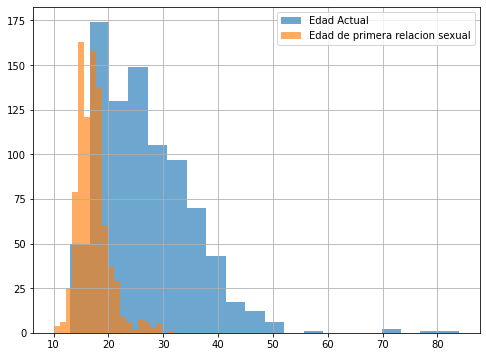

In [34]:
plt.figure(figsize = (8,6))
plt.hist(df["Age"], bins = 20, alpha = 0.65, label = 'Edad Actual')
plt.hist(df["Edad_Primer_relacion_Sexual"], bins = 20, alpha = 0.65, label = 'Edad de primera relacion sexual')
plt.legend()
plt.grid()

* La mayoria de las pacientes tienen entre 18 y 30 años
* La mayoria de las pacientes tuvieron su primer relacion a los 15 años

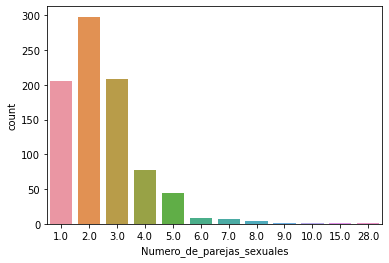

In [35]:
sns.countplot(df['Numero_de_parejas_sexuales']);

 #### La mayoria de las pacientes ha tenido dos parejas sexuales

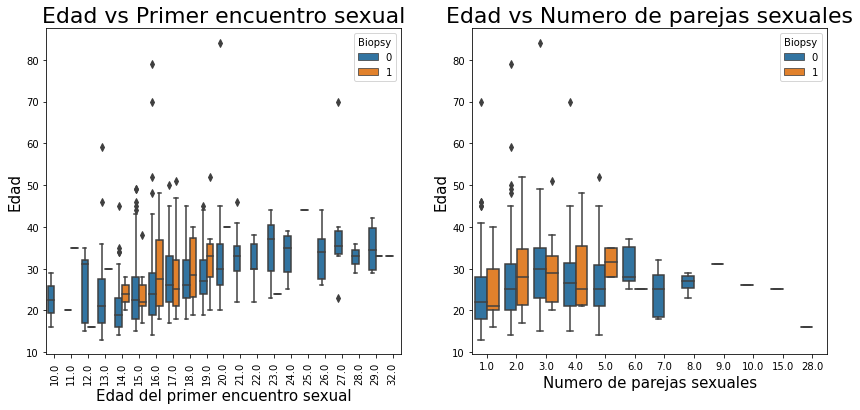

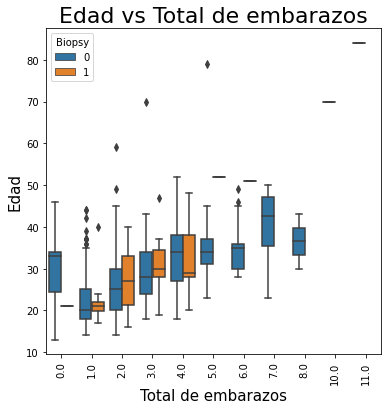

In [36]:
plt.subplots(1,2,figsize=(14,6))
plt.subplot(1,2,1)
a=sns.boxplot(x='Edad_Primer_relacion_Sexual',y='Age', hue='Biopsy',data=df)
a.axes.set_title("Edad vs Primer encuentro sexual",fontsize=22)
a.set_xlabel("Edad del primer encuentro sexual",fontsize=15)
a.set_ylabel("Edad",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Edad vs Numero de parejas sexuales',fontsize=22)
a=sns.boxplot(x='Numero_de_parejas_sexuales',y='Age', hue='Biopsy',data=df)
a.set_xlabel("Numero de parejas sexuales",fontsize=15)
a.set_ylabel("Edad",fontsize=15)
plt.show()
plt.figure(figsize=(6,6))
a=sns.boxplot(x='Numero_de_embarazos',y='Age', hue='Biopsy',data=df)
a.axes.set_title("Edad vs Total de embarazos",fontsize=22)
a.set_xlabel('Total de embarazos',fontsize=15)
plt.xticks(rotation=90)
a.set_ylabel("Edad",fontsize=15)
plt.show()

* Aquellos que tuvieron su primera relación sexual entre los 15 y 20 años de su vida son más propensos a dar positivo en la prueba de biopsia y esas personas se encuentran predominantemente en el grupo de edad de 20 a 35.
* Cuanto mayor sea el número de embarazos, mayores serán las posibilidades de obtener una prueba de biopsia positiva.

In [37]:
df.rename(columns={"Años de uso del anticonceptivo":"Años_de_uso_del_anticonceptivo"},inplace=True )

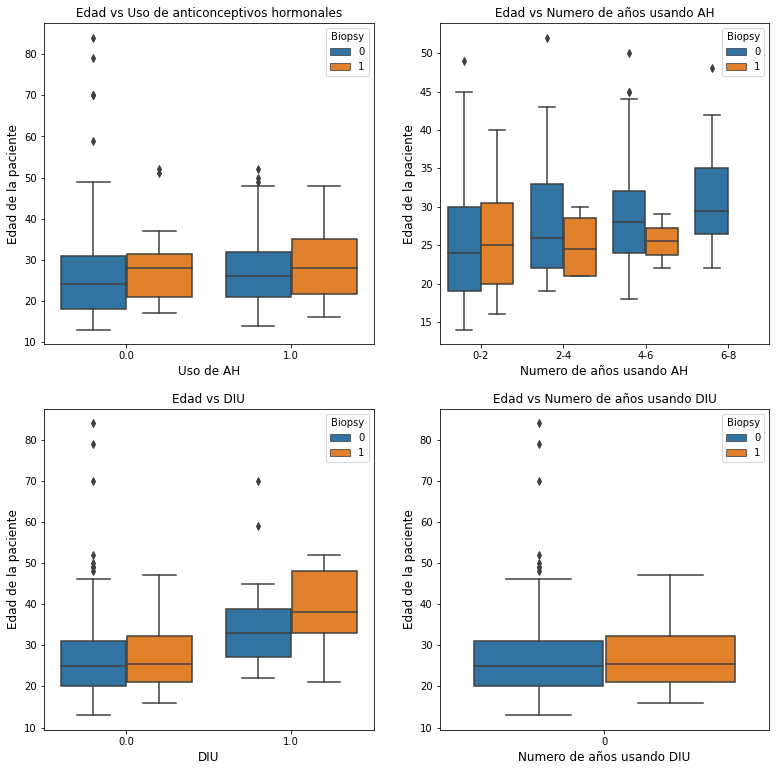

In [38]:
plt.subplots(2,2,figsize=(13,13))
plt.subplot(2,2,1)
c=sns.boxplot(hue='Biopsy',x='Anticonceptivos_hormonales',y='Age',data=df)
c.axes.set_title('Edad vs Uso de anticonceptivos hormonales',fontsize=12)
c.set_xlabel('Uso de AH',fontsize=12)
c.set_ylabel('Edad de la paciente',fontsize=12)
plt.subplot(2,2,2)
years=pd.cut(df.Años_de_uso_del_anticonceptivo,[0,2,4,6,8],labels=['0-2','2-4','4-6','6-8'])
c=sns.boxplot(x=years,y='Age',hue='Biopsy',data=df)
c.axes.set_title('Edad vs Numero de años usando AH',fontsize=12)
c.set_xlabel('Numero de años usando AH',fontsize=12)
c.set_ylabel('Edad de la paciente',fontsize=12)
plt.subplot(2,2,3)
c=sns.boxplot(hue='Biopsy',x='DIU',y="Age",data=df)
c.axes.set_title('Edad vs DIU',fontsize=12)
c.set_xlabel('DIU',fontsize=12)
c.set_ylabel('Edad de la paciente',fontsize=12)
plt.subplot(2,2,4)
c=sns.boxplot(x="IUD (years)",y='Age',hue='Biopsy',data=df)
c.axes.set_title('Edad vs Numero de años usando DIU',fontsize=12)
c.set_xlabel('Numero de años usando DIU',fontsize=12)
c.set_ylabel('Edad de la paciente',fontsize=12)
c=sns.boxplot()
plt.show()

* Los pacientes con 0-4 años de uso de anticonceptivos hormonales y la edad promedio entre 20 y 30 años dan  mayoritariamente positivo en la prueba de biopsia.
* Las personas que no usaron DIU y con edad entre 25 y 35 años, dan positivo en la prueba de Biopsia, mientras que entre las que usaron DIU, las personas de mayor edad (alrededor de 40) son más propensas al cáncer.

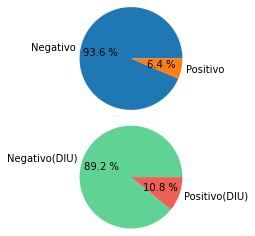

In [39]:
fig, axs = plt.subplots(2)
DIUpos = df[df['DIU']==1]

axs[0].pie(df["Biopsy"].value_counts(), labels=["Negativo","Positivo"], autopct="%.1f %%",radius=1.3)

axs[1].pie(DIUpos["Biopsy"].value_counts(),labels=["Negativo(DIU)","Positivo(DIU)"],autopct='%.1f %%',colors=["#60D394","#EE6055"],radius=1.3)

plt.show()

* El 6.4% del registro tiene un resultado de biopsia positivo, es decir, personas con cáncer de cuello uterino
* Con estas graficas de pastel queria comprobar si el uso del DIU influye en un resultado positivo en la biopsia y al parecer si es asi ya que tienen mas porcentaje de resultados positivos

## Conclusion
Nuestras pacientes suelen tener menos de 30 años , una gran proporción  relativamente mayor de pacientes son no fumadores (alrededor de 700) y solo unos pocos (alrededor de 100) son fumadores, el predominio de los pacientes tenía 2 parejas sexuales lo que nos dice que tenian una actividad sexual promedio.

La mayoría de los pacientes han utilizado métodos anticonceptivos hormonales como píldoras y medicamentos para el control de la natalidad, donde solo unos pocos han optado por dispositivos intrauterinos (DIU). La razón de esto puede ser que los anticonceptivos hormonales están fácilmente disponibles en las tiendas (necesita receta médica) y uno puede llevarlos a su casa por su cuenta con algún tipo de orientación, ya que el DIU necesita la supervisión de un médico y el paciente debe estar en el hospital, sin embargo parece ser que el uso del DIU podria ser una de las razones que podria provocar este cancer de cuello uterino al igual que el haber empezado una vida sexual a una temprnana edad.

Intuimos los objetivos secundarios (En base a la muestra) 
* Ver el promedio de edad de las personas positivas con la enfermedad de cuello uterino:
Notamos que la media de la edad de las personas que tienen la enfermedad de cuello uterino es de 28 años, y la mayoria de las personas quie tienen esta enfermedad tienen 21 y 28 años
* Promedio de parejas sexuales de las personas con la enfermedad de cuello uterino:
Notamos que la media de las parejas sexuales que han tenido de las personas que tienen la enfermedad de cuello uterino es de 2 parejas, lo cual indica que no es necesario haber tenido muchas parejas para tener esta enfermedad

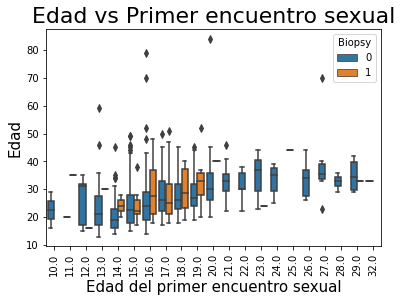

In [40]:
a=sns.boxplot(x='Edad_Primer_relacion_Sexual',y='Age', hue='Biopsy',data=df)
a.axes.set_title("Edad vs Primer encuentro sexual",fontsize=22)
a.set_xlabel("Edad del primer encuentro sexual",fontsize=15)
a.set_ylabel("Edad",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
positivos["Age"].describe()

count    55.000000
mean     28.636364
std       8.884784
min      16.000000
25%      21.000000
50%      28.000000
75%      34.500000
max      52.000000
Name: Age, dtype: float64

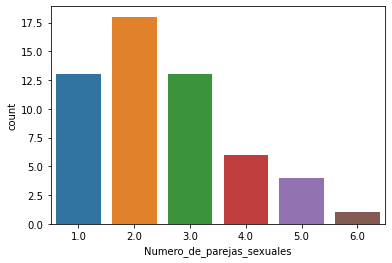

In [48]:
sns.countplot(positivos['Numero_de_parejas_sexuales']);

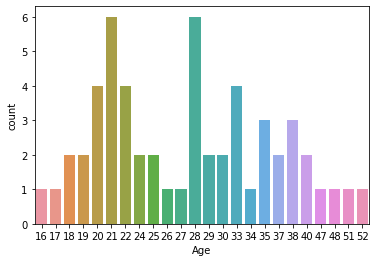

In [51]:
sns.countplot(positivos['Age']);

In [69]:
positivos[['Age', 'Numero_de_parejas_sexuales', 'Edad_Primer_relacion_Sexual',
       'Numero_de_embarazos']].mean()

Age                            28.636364
Numero_de_parejas_sexuales      2.509091
Edad_Primer_relacion_Sexual    17.072727
Numero_de_embarazos             2.472727
dtype: float64

In [70]:
positivos[['Age', 'Numero_de_parejas_sexuales', 'Edad_Primer_relacion_Sexual',
       'Numero_de_embarazos']].mode()

,Age,Numero_de_parejas_sexuales,Edad_Primer_relacion_Sexual,Numero_de_embarazos
0,21,2.0,17.0,2.0
1,28,NaN,NaN,NaN
